In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    
    n_fft = 64  # Small n_fft for short signals
    
    # Extract features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=n_fft)
    delta1 = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)
    zcr = librosa.feature.zero_crossing_rate(y)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=n_fft)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft)
    rms = librosa.feature.rms(y=y, frame_length=n_fft)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft)
    spectral_flatness = librosa.feature.spectral_flatness(y=y, n_fft=n_fft)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    
    return {
        'mfcc': mfcc,
        'delta1': delta1,
        'delta2': delta2,
        'zcr': zcr,
        'spectral_rolloff': spectral_rolloff,
        'spectral_centroid': spectral_centroid,
        'rms': rms,
        'chroma_stft': chroma_stft,
        'spectral_flatness': spectral_flatness,
        'spectral_bandwidth': spectral_bandwidth,
        'tonnetz': tonnetz,
    }

In [4]:
# Example usage
real_file = 'real.wav'
fake_file = 'fake.wav'

In [5]:
real_features = extract_features(real_file)

C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(


In [6]:
fake_features = extract_features(fake_file)

C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [7]:
# Assuming both audio files have the same sampling rate
sr = librosa.get_samplerate(real_file)

In [27]:
def plot_feature_pair(real_feature, fake_feature, feature_name, sr):
    plt.figure(figsize=(10, 4))
    
    # Plot real feature
    if feature_name in ['mfcc', 'delta1', 'delta2', 'spectral_contrast', 'tonnetz']:
        plt.subplot(1, 2, 1)
        librosa.display.specshow(real_feature, sr=sr, x_axis='time')
        plt.title(f'Real {feature_name.capitalize()}')
    else:
        plt.subplot(1, 2, 1)
        plt.plot(real_feature.T)
        plt.title(f'Real {feature_name.capitalize()}')

    # Plot fake feature
    if feature_name in ['mfcc', 'delta1', 'delta2', 'spectral_contrast', 'tonnetz']:
        plt.subplot(1, 2, 2)
        librosa.display.specshow(fake_feature, sr=sr, x_axis='time')
        plt.title(f'Fake {feature_name.capitalize()}')
    else:
        plt.subplot(1, 2, 2)
        plt.plot(fake_feature.T)
        plt.title(f'Fake {feature_name.capitalize()}')

    plt.tight_layout()
    plt.show()

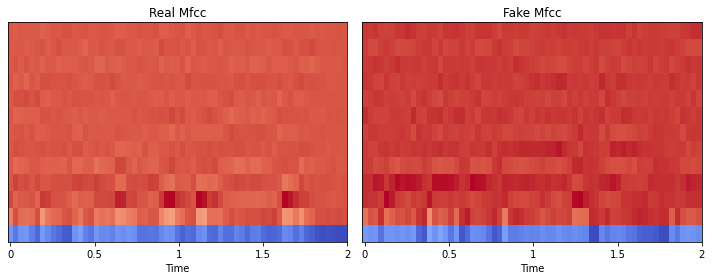

In [12]:
plot_feature_pair(real_features['mfcc'], fake_features['mfcc'], 'mfcc', sr)

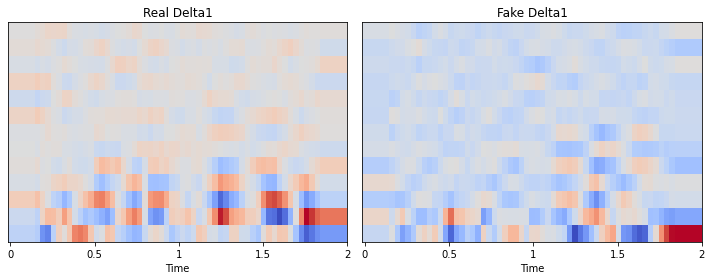

In [14]:
plot_feature_pair(real_features['delta1'], fake_features['delta1'], 'delta1', sr)

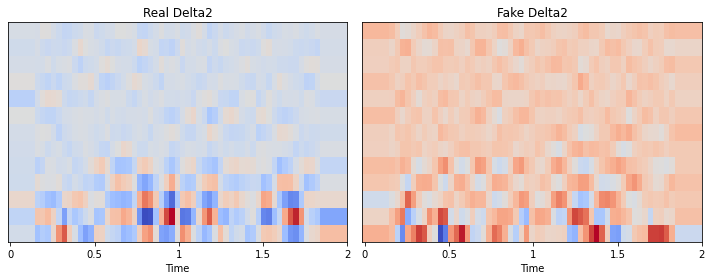

In [15]:
plot_feature_pair(real_features['delta2'], fake_features['delta2'], 'delta2', sr)

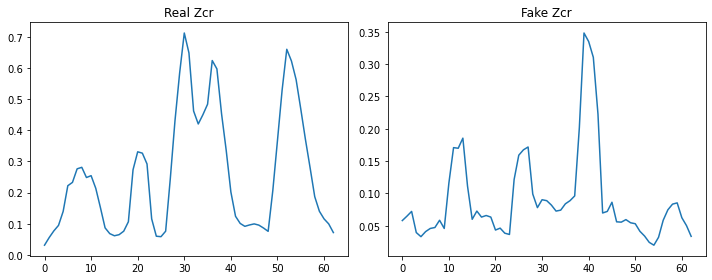

In [16]:
plot_feature_pair(real_features['zcr'], fake_features['zcr'], 'zcr', sr)

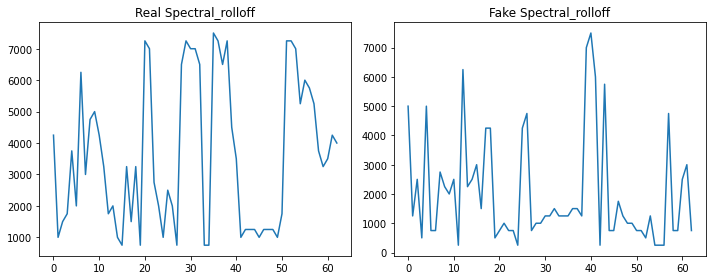

In [17]:
plot_feature_pair(real_features['spectral_rolloff'], fake_features['spectral_rolloff'], 'spectral_rolloff', sr)

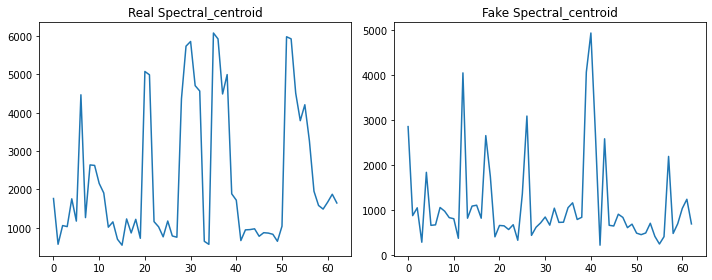

In [18]:
plot_feature_pair(real_features['spectral_centroid'], fake_features['spectral_centroid'], 'spectral_centroid', sr)

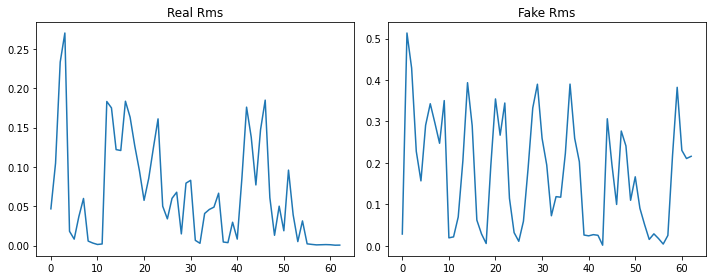

In [19]:
plot_feature_pair(real_features['rms'], fake_features['rms'], 'rms', sr)

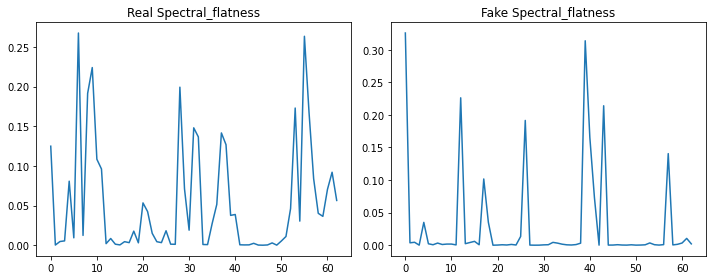

In [21]:
plot_feature_pair(real_features['spectral_flatness'], fake_features['spectral_flatness'], 'spectral_flatness', sr)

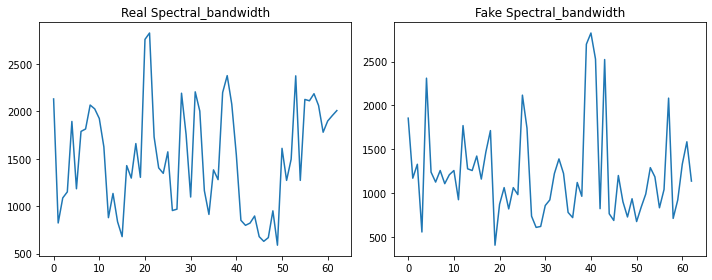

In [22]:
plot_feature_pair(real_features['spectral_bandwidth'], fake_features['spectral_bandwidth'], 'spectral_bandwidth', sr)

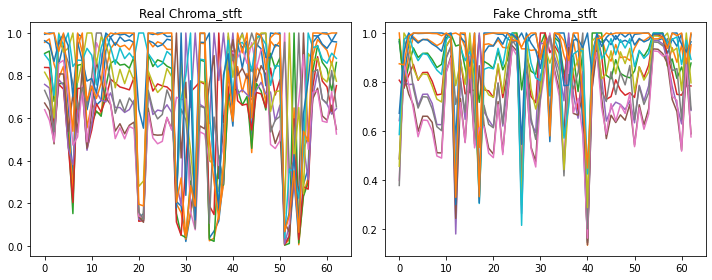

In [20]:
plot_feature_pair(real_features['chroma_stft'], fake_features['chroma_stft'], 'chroma_stft', sr)

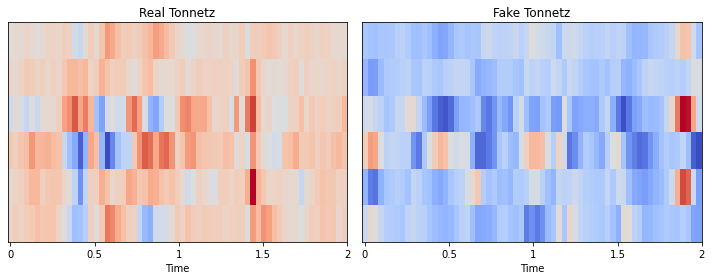

In [24]:
plot_feature_pair(real_features['tonnetz'], fake_features['tonnetz'], 'tonnetz', sr)